# Lab 4

## import python libraries, connect to database

In [23]:
import pandas
import configparser
import psycopg2

In [85]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [86]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname=db
                        ) 

In [87]:
cur=conn.cursor() 

# Q1

In [27]:
sql_q1 = """
            select * from gp8.student
            """

In [28]:
df= pandas.read_sql_query(sql_q1,conn)
df[:] 

s_email        s_name major
0  branicab@dukes.jmu.edu  Alex Branick    IA
1        s1@dukes.jmu.edu            S1  IA\n
2        s2@dukes.jmu.edu            S2  POSC
3        s3@dukes.jmu.edu            S3    IA
4        s4@dukes.jmu.edu            S4  POSC

# Q2

In [29]:
sql_q2 = """
        select gp8.professor.p_name,
        gp8.course.course_name
        from gp8.professor
        inner join gp8.course
        on gp8.professor.p_email = gp8.course.p_email
        
        """

In [30]:
df= pandas.read_sql_query(sql_q2,conn)
df[:]

p_name     course_name
0  New Prof         New IA 
1  New Prof     Data Mining
2  New Prof  Intro to Data

# Q3

In [31]:
sql_q3 = """
        select course_num,
        count(course_num) as enrolled
        from gp8.enroll_list
        group by course_num
        order by enrolled desc
        """


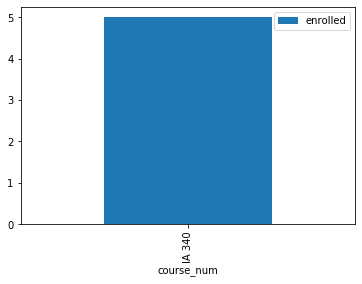

In [32]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='course_num')

# Q4

In [33]:
sql_q4 = """
        select gp8.professor.p_name,
        count(gp8.course.course_name) as teaching_number
        from gp8.professor
        inner join gp8.course
        on gp8.professor.p_email = gp8.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

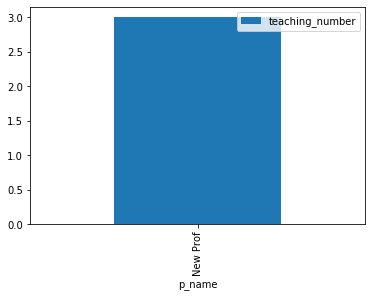

In [34]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

# Q5

In [58]:
sql_q5_professor = """
                    insert into gp8.professor(p_email , p_name, office)
                    values('{}','{}','{}')
                    """.format('newp@jmu.edu','new p','new off')


In [59]:
cur.execute(sql_q5_professor)


In [60]:
conn.commit()

In [61]:
df=pandas.read_sql_query('select * from gp8.professor',conn)
df[:]

p_email            p_name      office
0  hendrinx@jmu.edu  Noel Hendrickson         N/A
1  moore8ka@jmu.edu    Kathleen Moore    ISAT 116
2  marrinsp@jmu.edu    Stephen Marrin  EnGeo 2104
3     new_p@jmu.edu          New Prof         New
4      newp@jmu.edu             new p     new off

In [62]:
sql_q5_course = """
                    insert into gp8.course(course_num, course_name, room_num, p_email)
                    values('{}','{}','{}','{}')
                    """.format('ia new','new course','online','newp@jmu.edu')

In [63]:
cur.execute(sql_q5_course)

In [64]:
conn.commit()

In [65]:
df=pandas.read_sql_query('select * from gp8.course',conn)
df[:]

course_num     course_name room_num        p_email
0      NewIA         New IA       New  new_p@jmu.edu
1     IA 340     Data Mining   Online  new_p@jmu.edu
2     IA 240  Intro to Data    Online  new_p@jmu.edu
3     ia new      new course   online   newp@jmu.edu

# Q6

In [66]:
sql_q6_course = """
                update gp8.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p@jmu.edu','weixx@jmu.edu')

In [67]:
cur.execute(sql_q6_course)

In [68]:
#cur.execute('ROLLBACK')

In [69]:
conn.commit()

In [71]:
df=pandas.read_sql_query('select * from gp8.course',conn)
df[:]

course_num     course_name room_num        p_email
0      NewIA         New IA       New  new_p@jmu.edu
1     IA 340     Data Mining   Online  new_p@jmu.edu
2     IA 240  Intro to Data    Online  new_p@jmu.edu
3     ia new      new course   online   newp@jmu.edu

### for above table, professor emails were already switched from weixx@jmu.edu to new_p@jmu.edu, hence why the change is not shown 

In [88]:
sql_q6_professor = """
                delete from gp8.professor
                where p_email = '{}'
                """.format('hendrinx@jmu.edu')

### changed the email to delete from weixx@jmu.edu to hendrinx@jmu.edu, wei email was already deleted last lab, and couldn't delete new professor email since it is still connected to courses.  Deleted extra email in table that was not connected to any courses. 

In [89]:
cur.execute(sql_q6_professor)

In [90]:
conn.commit()

In [91]:
df=pandas.read_sql_query('select * from gp8.professor',conn)
df[:]

p_email          p_name      office
0  moore8ka@jmu.edu  Kathleen Moore    ISAT 116
1  marrinsp@jmu.edu  Stephen Marrin  EnGeo 2104
2     new_p@jmu.edu        New Prof         New
3      newp@jmu.edu           new p     new off

# Close Connection

In [92]:
cur.close()
conn.close()